In [2]:
import os
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt

print(os.getcwd())
img_dir = os.path.join(os.getcwd(), "PGPShelf")
print(img_dir)
%matplotlib inline

/home/minh/workspace/git/hbrs_courses/16s_rp
/home/minh/workspace/git/hbrs_courses/16s_rp/PGPShelf


In [8]:
def compute_surf(image, hessian_threshold):
    surf = cv2.xfeatures2d.SURF_create(hessian_threshold)
    kp, des = surf.detectAndCompute(image, None)
    img2 = cv2.drawKeypoints(image, kp, None, (0,255,0), 4)
    #cv2.startWindowThread()
    #cv2.namedWindow(image_name+"-SURF")
    #cv2.imshow(image_name+"-SURF",img2)
    plt.figure(figsize=(15,15))
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.imshow(img2)
    return kp,des

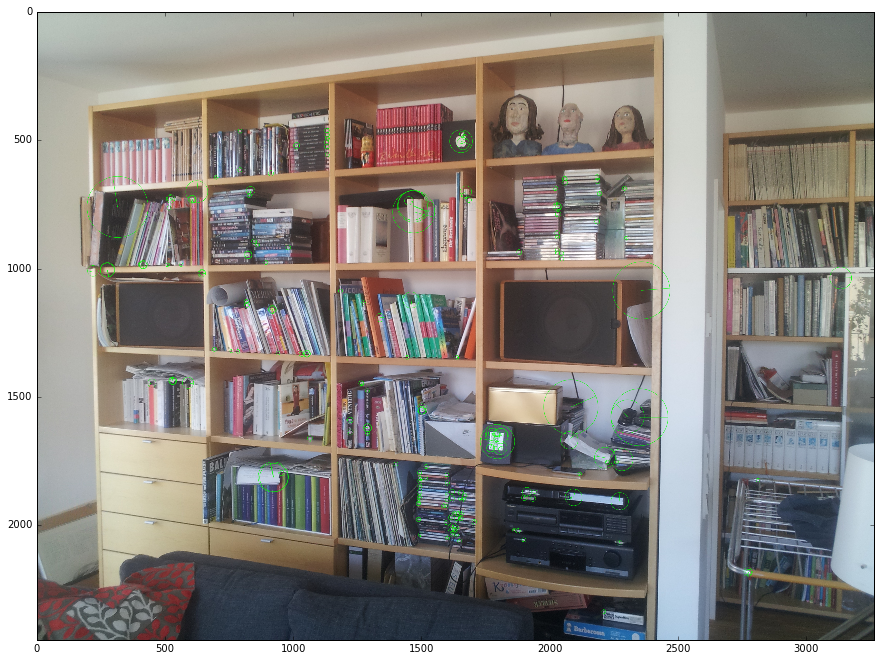

In [9]:
img1 = cv2.imread(os.path.join(img_dir, '20150616_074444.jpg'))
kp_img1, des_img1 = compute_surf(img1, 10000)

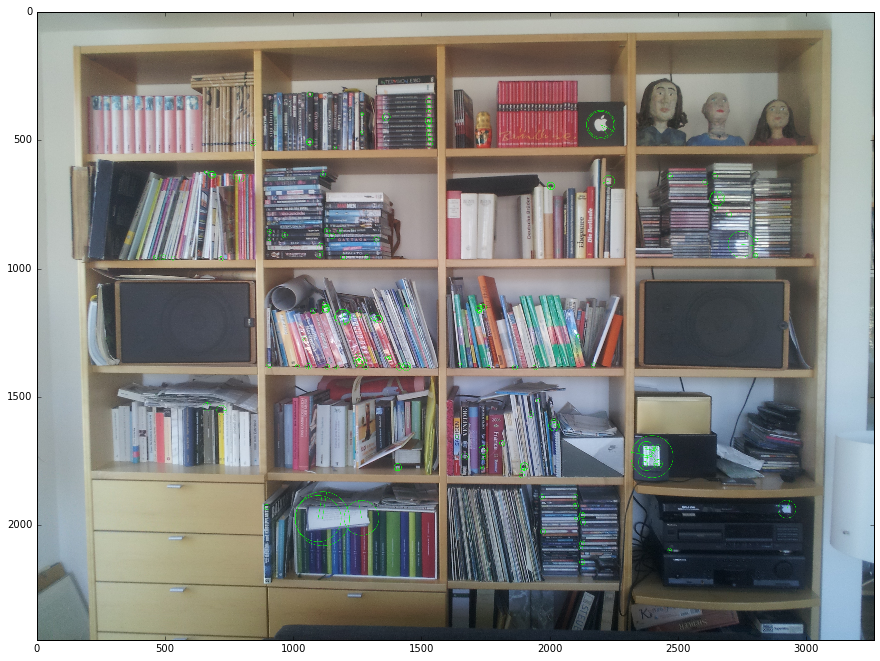

In [10]:
img2 = cv2.imread(os.path.join(img_dir, '20150616_074411.jpg'))
kp_img2, des_img2 = compute_surf(img2, 10000)

186


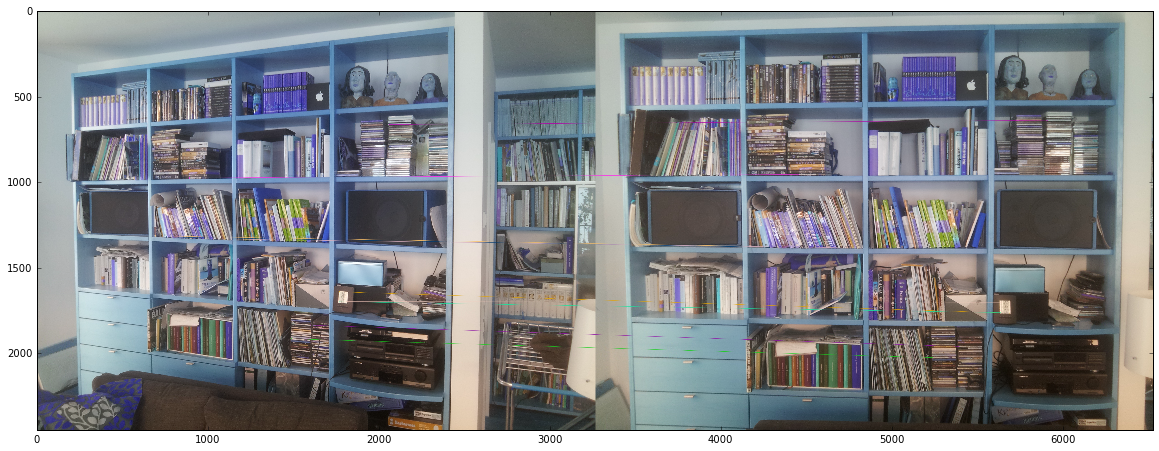

(<matplotlib.image.AxesImage at 0x7f4650fc9a58>, None)

In [25]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
print(len(des_img1))

# Match descriptors.
matches = bf.match(des_img1, des_img2)
 
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
 
# Draw first 10 matches.
img3 = cv2.drawMatches(img1, kp_img1, img2, kp_img2, matches[:10], outImg=None, flags=2)

plt.figure(figsize=(20, 10))
plt.imshow(img3),plt.show()

In [48]:
correspondence_img1 = np.array(list(map(lambda x:np.array(kp_img1[x.queryIdx].pt), matches)))
correspondence_img2 = np.array(list(map(lambda x:np.array(kp_img1[x.trainIdx].pt), matches)))
#print(correspondence_img2)

In [50]:
fundamental_matrix = cv2.findFundamentalMat(correspondence_img1, correspondence_img2, method=cv2.FM_8POINT)[0]
print(fundamental_matrix)


[[ -2.38306856e-07   5.08100028e-07  -4.52129125e-04]
 [  1.47933058e-06  -1.39710928e-06   6.33158157e-05]
 [ -1.17726777e-03   4.39103758e-04   1.00000000e+00]]


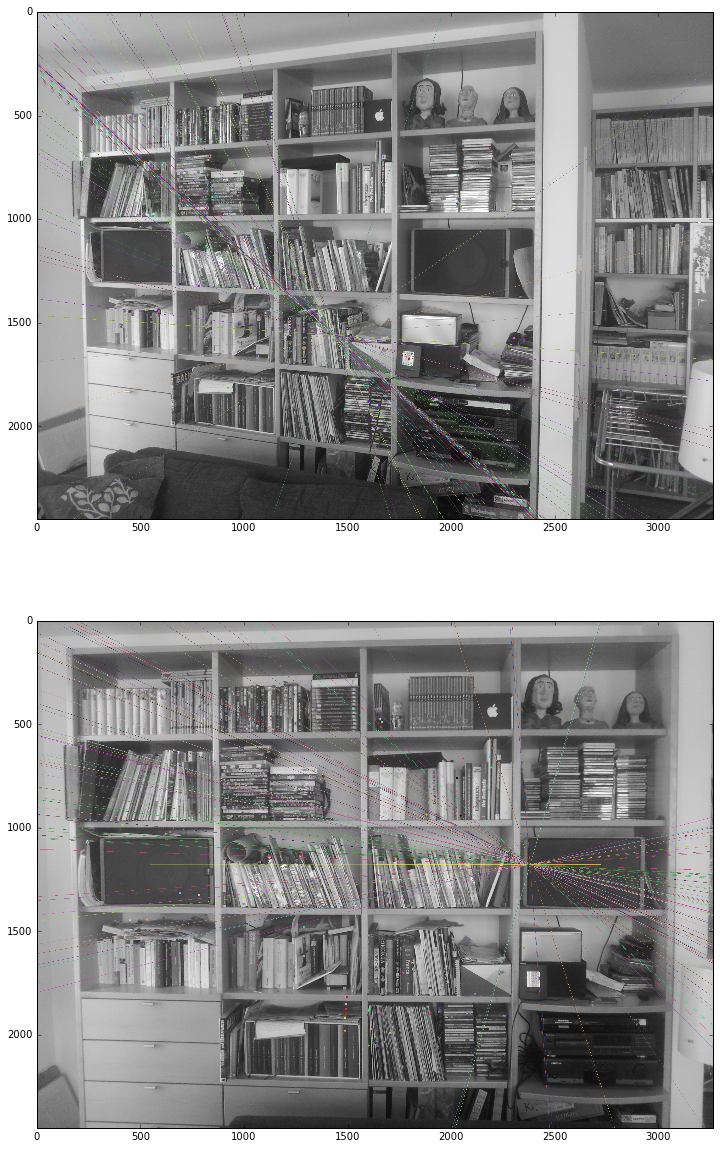

In [52]:
from robot_perception.src.fundamental_matrix_estimation import util

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

util.draw_epilines(img1_gray, img2_gray, correspondence_img1, correspondence_img2, fundamental_matrix)